# Árvores de Decisão

- Escolher uma base de dados para análise.
- Fazer classificação dos dados utilizando árvore de decisão.
- Faça análise de desempenho da solução:
 - métricas de desempenho (acurácia, recall, ROC, …) 
 - critério (Gini, Entropia, ...)
 - técnicas de treinamento (validação cruzada, …)
- Apresente os resultados com conclusões em 5 minutos.


## Treinamento

In [93]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn import datasets

import random

In [ ]:
#idv2 74:48 - 94:25 --- 74.8 - 94.42
#idv7 138:23 -142:02 --- 138.38333 - 142.03
#idv6 196:56 - 212:01 --- 196.93 ---212.016


In [30]:
data = pd.read_csv("slopes_hour.csv", index_col=0)
data['target'] = "NORM"
data.loc[(data['target'].index >= 74.8) & (data['target'].index <= 94.42), 'target'] = "IDV2"
data.loc[(data['target'].index >= 138.38) & (data['target'].index <= 142.03), 'target'] = "IDV7"
data.loc[(data['target'].index >= 196.93) & (data['target'].index <= 212.06), 'target'] = "IDV6"

In [64]:
data.drop(data[data['target'] == "IDV7"].index, inplace=True)

In [65]:
data['target'].value_counts()

NORM    12699
IDV2       59
IDV6       46
Name: target, dtype: int64

In [94]:
random.shuffle(data.columns.values[0:-1])

In [95]:
data_norm = data[data['target'] == "NORM"]
data_balanced = data_norm.sample(n=60)
data_balanced = data_balanced.append(data[data['target'] == "IDV6"])
data_balanced = data_balanced.append(data[data['target'] == "IDV2"])
data_balanced

,XMEAS02,XMEAS13,XMEAS14,XMEAS22,XMEAS07,XMEAS21,XMEAS09,XMEAS08,XMEAS01,XMEAS16,...,XMEAS19,XMEAS10,XMEAS18,XMEAS12,XMEAS17,XMEAS06,XMEAS15,XMEAS05,XMEAS20,target
2712.000000,9.522779e-06,-0.452687,-0.012470,0.000835,-0.002983,0.008621,0.005519,-0.021354,-0.000979,4.792388e-05,...,0.005867,-0.116310,0.001819,0.001901,-0.000147,-0.043791,0.003217,0.000329,-0.003579,NORM
3838.333333,-1.393523e-04,-0.965876,-0.362866,-0.003351,0.002848,-0.005327,-0.030079,0.033277,-0.000075,4.513932e-05,...,-0.000138,-0.019084,-0.016576,-0.001796,-0.000388,0.085876,-0.001938,-0.000017,0.001063,NORM
2439.000000,-2.641722e-05,0.291516,-0.894922,0.000857,-0.003600,0.003921,-0.041765,-0.023261,-0.000542,-3.334040e-05,...,-0.002404,-0.004957,-0.049637,0.003552,0.001290,-0.017934,-0.015272,0.000371,-0.011848,NORM
2753.666667,-4.793161e-05,0.991813,0.206875,0.002125,-0.006373,-0.002342,0.025881,-0.023315,0.000970,-1.187202e-04,...,0.003078,-0.032324,0.033727,0.004933,-0.000494,0.043338,0.009881,-0.000870,0.002259,NORM
3096.000000,-5.449347e-05,0.471542,0.297110,-0.002519,-0.002831,-0.003791,-0.046584,-0.020968,-0.000687,-1.629005e-04,...,-0.000089,-0.013458,-0.042008,-0.005586,-0.000628,-0.026628,-0.007524,-0.000599,-0.012668,NORM
2371.666667,1.976692e-05,0.475879,0.242188,-0.001190,-0.001413,0.011554,0.034815,0.033593,0.000978,3.639561e-05,...,0.002403,0.005819,0.026438,0.009432,-0.000154,-0.033864,-0.007216,-0.001561,-0.001877,NORM
1399.000000,-4.133124e-05,-0.142618,-0.055985,0.000645,-0.007849,-0.000755,-0.003472,-0.031645,0.000169,4.570345e-06,...,-0.000704,0.004371,0.015706,0.005737,0.000870,0.009150,-0.000723,-0.001254,0.009346,NORM
1601.000000,-7.138361e-06,-0.359048,-0.552025,0.002965,0.014558,0.000850,0.051250,0.006600,0.000343,-5.943661e-05,...,-0.000842,-0.010487,0.049537,-0.001334,0.000200,0.040604,-0.010280,0.000939,0.002769,NORM
3260.333333,-1.902504e-05,-1.584728,-0.603712,-0.000523,0.008893,-0.001249,0.038957,-0.051399,-0.000416,-2.867025e-05,...,-0.000499,0.067650,0.009241,-0.002815,0.000265,0.002321,0.003655,0.000484,0.005146,NORM
1193.666667,3.976484e-05,-1.082586,-1.037894,0.000806,-0.003381,0.005627,0.022647,-0.011414,-0.000522,-5.337166e-06,...,-0.004725,0.028282,0.024657,0.005387,0.000314,-0.028685,-0.001389,-0.001884,-0.009808,NORM


In [123]:
random.shuffle(data_balanced.columns.values[0:-1])

In [117]:
data_balanced['target'].value_counts()

NORM    60
IDV2    59
IDV6    46
Name: target, dtype: int64

In [124]:
X_train, X_test, y_train, y_test = train_test_split(data_balanced[data_balanced.columns[0:-1]], data_balanced['target'], test_size=0.3, train_size=0.7)

{'decision_tree__criterion': 'gini', 'decision_tree__max_depth': 2}
0.26
              precision    recall  f1-score   support

        IDV2       0.25      0.35      0.29        17
        IDV6       0.44      0.22      0.30        18
        NORM       0.18      0.20      0.19        15

   micro avg       0.26      0.26      0.26        50
   macro avg       0.29      0.26      0.26        50
weighted avg       0.30      0.26      0.26        50



/home/rute/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


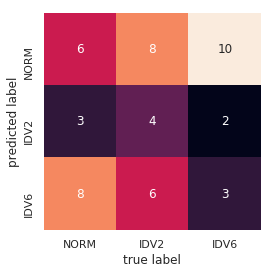

In [125]:
# Load data
#data = datasets.load_breast_cancer()
target_names = ['NORM', 'IDV2', 'IDV6']

# Cross Validation
model = DecisionTreeClassifier()

steps = [
#   Prepocessing
##  Calculate slopes
#   ('slope', estimate_slopes),
##  Feature Selection
#   ('feat_sel', feat_sel),
    ('decision_tree', model)
]
pipe = Pipeline(steps)

pipe_params = {
#     'slope__n': range(3, 21), # 2 < n <= 20, equivalente a 12 minutos
    'decision_tree__max_depth': range(1, 11),
    'decision_tree__criterion': ['gini', 'entropy']
}

grid_cv = GridSearchCV(pipe, param_grid=pipe_params, cv=10)
grid_cv.fit(X_train, y_train)
best_params = grid_cv.best_params_
y_pred = grid_cv.predict(X_test)

print(grid_cv.best_params_)
print(grid_cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [67]:
y_train.value_counts()

NORM    8888
IDV2      40
IDV6      34
Name: target, dtype: int64